# <font color='#D55000'>Machine Learning: Linear Regression</font>

## 1. A simple function in python
<font size = '3'>The first part of this script gives you practice with PYTHON syntax. Run it to return a 5 x 5 identity matrix by filling in the following code:<font>

In [ ]:
import numpy as np
A = np.identity(5)
print(A)

## 2. Linear regression with one variable
<font size = '3'>In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.</font>

<font size = '3'>The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.</font>

### 2.1 Plotting the data
<font size = '3'>Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Many other problems that you will encounter in real life are multi-dimensional and can't be plotted on a 2-d plot.
Run the code below to load the dataset from the data file into the variables X and y:</font>

In [ ]:
data = np.genfromtxt('ex1data1.txt', delimiter = ',', dtype = float)
X = np.reshape(data[:, 0], (-1, 1))
y = np.reshape(data[:, 1], (-1, 1))

<font size = '3'>Next, generate code below to draw the plot:</font>

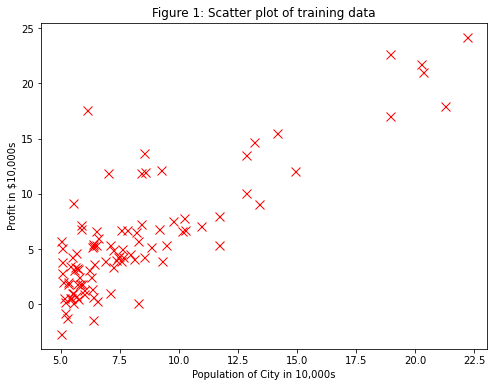

In [3]:
import matplotlib.pyplot as plt
# set size
plt.figure(figsize = (8,6))
# plot data
plt.plot(X,y, 'x', mec = 'r', ms = 9)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 1: Scatter plot of training data')
plt.show()

### 2.2 Gradient descent
<font size = '3'>In this section, you will fit the linear regression parameters to our dataset using gradient descent.</font>
#### 2.2.1 Update equations
<font size = '3'>The objective of linear regression is to minimize the cost function</font>
$$J(\theta) = \frac{1}{2m}\sum_{i = 0}^{m} \left(h_\theta(x^{(i)})-y^{(i)}\right)^2$$
<font size = '3'>where the hypothesis $h_\theta(x)$ is given by the linear model</font> 
$$h_\theta(x) = \theta^Tx = \theta_0+\theta_1x_1$$
<font size = '3'>Recall that the parameters of your model are the $\theta$ values. These are the values you will adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update</font>
$$\theta_j:=\theta_j - \alpha\frac{1}{m}\sum_{i = 1}^{m} \left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$
<font size = '3'>With each step of gradient descent, your parameters $j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$.</font>
#### 2.2.2 Implementation
<font size = '3'>We will set up the data for linear regression. In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. Run the code below to initialize the parameters to 0 and the learning rate alpha to 0.01. </font>

In [4]:
m = X.shape[0] # number of training examples
X = np.concatenate((np.ones((m, 1)),X), axis = 1) # add column 1 to X
theta = np.zeros((2, 1)) # initial theta with value 0
iterations = 1500
alpha = 0.01

#### 2.2.3 Computing the cost $J(\theta)$
<font size = '3'>As you perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation.</font>

In [5]:
def computeCost(X, y, theta, m):
    J = np.sum((X.dot(theta) - y)**2) / (2 * m)
    return J

<font size = '3'>The code below will call computeCost once using $\theta$ initialized to zeros, and you will see the cost printed to the screen. You should expect to see a cost of 32.07 for the first output below:</font>

In [6]:
computeCost(X, y, theta, m)

32.072733877455676

<font size = '3'>Next we call computeCost again, this time with non-zero theta values as an additional test. You should expect to see an output of 54.24 below:</font>

In [7]:
computeCost(X, y, np.array([[-1], [2]]), m)

54.24245508201238

#### 2.2.4 Gradient descent
<font size = '3'>Next, you will implement gradient descent. As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. Refer to the equations given earlier if you are uncertain.</font>

In [8]:
def gradientDescent(X, y, theta, alpha, iterations, m):
    for i in range(iterations):
        theta = theta - alpha * X.T.dot(X.dot(theta) - y) / m;
    return theta

<font size = '3'>After you are finished, run this section.</font>

Theta computed from gradient descent:  -3.63029143940436 , 1.166362350335582


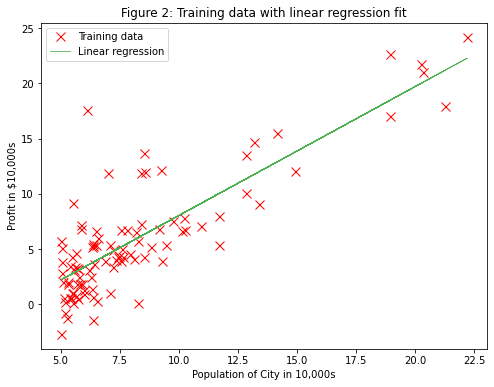

In [9]:
# run gradient descent, compute theta:
theta = gradientDescent(X, y, theta, alpha, iterations, m)
print('Theta computed from gradient descent: ', theta[0,0], ',', theta[1,0])
# increase size of default figure
plt.figure(figsize = (8,6))
plt.plot(X[:, 1], y, 'x', mec = 'r', ms = 9, label = 'Training data')
plt.plot(X[:, 1], X.dot(theta), color = '#4CAF50', linewidth = '.8', label = 'Linear regression')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Figure 2: Training data with linear regression fit')
plt.legend()
plt.show()

## 2.Linear regression with multiple variables
<font size = '3'>In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.</font>

<font size = '3'>The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house. Run this section now to preview the data.</font>

In [10]:
data = np.genfromtxt('ex1data2.txt', delimiter = ',')
X = data[:, 0:2]
y = np.reshape(data[:, 2], (-1, 1))
m = y.shape[0]

### Feature normalization
<font size= '3'>This section of the script will start by loading and displaying some values from this dataset. By looking at the values, note that house sizes are about 1000 times the number of bedrooms. When features differ by orders of magnitude, first performing feature scaling can make gradient descent converge much more quickly.</font>

<font size = '3'>The standard deviation is a way of measuring how much variation there is in the range of values of a particular feature (most data points will lie within $\pm$ standard deviations of the mean); this is an alternative to taking the range of values (max - min). At the time that featureNormalize is called, the extra column of 1's corresponding to  has not yet been added to X (see the code below for details).</font>

In [11]:
def featureNormalize(X):
    mu = X.mean(axis = 0)
    sigma = X.std(axis = 0)
    X = (X - mu)/sigma
    return X, mu, sigma

<font size = '3'>When you are finished with featureNormailize, run this section to normailze the features of the housing dataset.</font>

In [12]:
X, mu, sigma = featureNormalize(X)

### Add bias term
<font size = '3'>Now that we have normailzed the features, we again add a column of ones corresponding to $\theta_0$ to the data matrix X.</font>

In [13]:
X = np.concatenate((np.ones((m, 1)), X), axis = 1)

## 3.2 Gradient descent
<font size = '3'>Previously, you implemented gradient descent on a univariate regression problem. The only difference now is that there is one more feature in the matrix X. The hypothesis function and the batch gradient descent update rule remain unchanged.</font>

<font size = '3'>Make sure your code supports any number of features and is well-vectorized. You can use the command size(X,2) to find out how many features are present in the dataset.</font>

<font size = '3'>**Implementation Note:** In the multivariate case, the cost function can also be written in the following vectorized form:</font>

$$J(\theta) = \frac{1}{2m} \left(X\theta - \vec{y}\right)^T \left(X\theta - \vec{y}\right)$$
<font size = '3'>Where</font>
$$X = \begin{bmatrix} -\left(x^{(1)}\right)^T- \\ -\left(x^{(2)}\right)^T- \\ ... \\ -\left(x^{(3)}\right)^T-\end{bmatrix} \qquad \vec{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ y^{(3)}\end{bmatrix}$$

In [14]:
def gradientDescentMulti(X, y, theta, alpha, iterations, m):
    J = np.zeros((iterations, 1))
    for i in range(iterations):
        theta = theta - alpha * X.T.dot(X.dot(theta) - y) / m;
        J[i, 0] = np.sum((X.dot(theta) - y)**2) / (2 * m)
    # compute cost gradient descent multi
    return theta, J

<font size = '3'>The vectorized version is efficient when you're working with numerical computing tools like PYTHON. If you are an expert with matrix operations, you can prove to yourself that the two forms are equivalent.</font>

In [15]:
alpha = 0.1
iterations = 400
theta = np.zeros((3, 1))
theta, J_hist = gradientDescentMulti(X, y, theta, alpha, iterations, m)
print('Theta computed from gradient descent: ', theta)

Theta computed from gradient descent:  [[340412.65957447]
 [109447.79558639]
 [ -6578.3539709 ]]


<font size = '3'>Finally, you should complete and run the code below to predict the price of a 1650 sq-ft, 3 br house using the value of theta obtained above.</font>

In [16]:
def predict(price, theta):
    return price.dot(theta)[0]
price = np.array([1, 1650, 3])
predict(price, theta)

180909540.31519747

### 3.2.1 Selecting learning rates
<font size = '3'>In this part of the exercise, you will get to try out dierent learning rates for the dataset and find a learning rate that converges quickly. You can change the learning rate by modifying the code below and changing the part of the code that sets the learning rate.</font>
<font size = '3'>Run code below to </font>

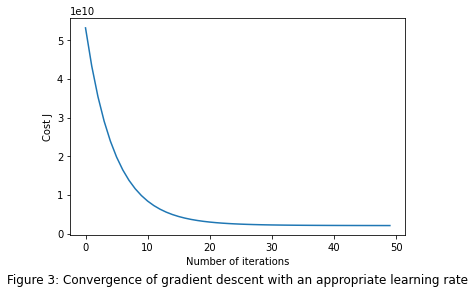

In [27]:
plt.plot(np.arange(start = 0, stop = 50, step = 1), J_hist[0:50])
plt.title('Figure 3: Convergence of gradient descent with an appropriate learning rate', y = -0.25)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()